In [1]:
import pandas as pd
import numpy as np
import folium
from ipyleaflet import Map, Polyline

import warnings
warnings.simplefilter("ignore", UserWarning)

from features.map import *

In [2]:
# Load the traffic data CSV file into a pandas DataFrame
df_traffic = pd.read_csv('data/data/E-tmja-2019.csv', sep=";")
df_traffic

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,absF,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL
0,01/01/2019,31D0044,44,0,31,N,0,0,"511656,78","6204078,36",...,44,44,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,NaN
1,01/01/2019,31D0044E,762,0,31,N,0,0,"511367,22","6204210,06",...,762,762,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,NaN
2,01/01/2019,69D0301,6055,2,69,N,-981,0,"844036,84","6510806,45",...,71,6055,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,NaN
3,01/01/2019,69D0383,13752,4,69,N,-494,0,"846831,3","6522372,16",...,544,13752,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,NaN
4,01/01/2019,69D0383BPNL,2408,0,69,N,0,0,"844982,46","6522772,27",...,413,2408,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060,8,76,N,0,0,"560104,39","6927892,82",...,960,2060,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,NaN
4691,01/01/2019,P0224,8995,211,31,N,-638,0,"555988,61","6288880,3",...,344,8995,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,NaN
4692,01/01/2019,P0524,1777,31,33,N,-768,0,"440252,1","6361052,92",...,1009,1777,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,NaN
4693,01/01/2019,P0524,3860,31,33,N,1009,1777,"458798,85","6325912,32",...,568,5637,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,NaN


In [3]:
df_route = distance_road_region("data/TCRD_076.xlsx")
df_route

,Région,Autoroutes,Routes nationales,Routes_tot
0,Auvergne-Rhône-Alpes,1698,1100,2798
1,Bourgogne-Franche-Comté,901,773,1674
2,Bretagne,50,1009,1059
3,Centre-Val de Loire,980,342,1322
4,Corse,0,0,0
5,Grand Est,1305,935,2240
6,Hauts-de-France,1179,567,1746
7,Île-de-France,620,489,1109
8,Normandie,728,570,1298
9,Nouvelle-Aquitaine,1465,1284,2749


In [4]:
df_traffic.columns

Index(['dateReferentiel', 'route', 'longueur', 'prD', 'depPrD',
       'concessionPrD', 'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF',
       'concessionPrF', 'absF', 'cumulF', 'xF', 'yF', 'zF',
       'anneeMesureTrafic', 'typeComptageTrafic', 'typeComptageTrafic_lib',
       'TMJA', 'ratio_PL'],
      dtype='object')

In [5]:
df_traffic = preprocess_data(df_traffic)
df_traffic

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL
0,01/01/2019,31D0044,44.0,0,31,N,0,0,"511656,78","6204078,36",...,44,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,0.0,NaN
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,"511367,22","6204210,06",...,762,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,0.0,NaN
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,"844036,84","6510806,45",...,6055,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,0.0,NaN
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,"846831,3","6522372,16",...,13752,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,0.0,NaN
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,"844982,46","6522772,27",...,2408,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060.0,8,76,N,0,0,"560104,39","6927892,82",...,2060,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,0.0,NaN
4691,01/01/2019,P0224,8995.0,211,31,N,-638,0,"555988,61","6288880,3",...,8995,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,0.0,NaN
4692,01/01/2019,P0524,1777.0,31,33,N,-768,0,"440252,1","6361052,92",...,1777,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,0.0,NaN
4693,01/01/2019,P0524,3860.0,31,33,N,1009,1777,"458798,85","6325912,32",...,5637,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,0.0,NaN


In [6]:
data = add_lat_lon_columns(df_traffic)
data

C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\chach\OneDrive - HE

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,lonD,latD,lonF,latF
0,01/01/2019,31D0044,44.0,0,31,N,0,0,511656.78,6204078.36,...,NaN,NaN,NaN,NaN,0.0,NaN,0.695459,42.911382,0.695975,42.911263
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,511367.22,6204210.06,...,NaN,NaN,NaN,NaN,0.0,NaN,0.691871,42.912490,0.698322,42.908331
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,844036.84,6510806.45,...,NaN,NaN,NaN,NaN,0.0,NaN,4.850575,45.681629,4.918315,45.667307
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,846831.3,6522372.16,...,NaN,NaN,NaN,NaN,0.0,NaN,4.890020,45.785151,4.844653,45.696348
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,844982.46,6522772.27,...,NaN,NaN,NaN,NaN,0.0,NaN,4.866352,45.789149,4.890020,45.785151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060.0,8,76,N,0,0,560104.39,6927892.82,...,0.0,NaN,NaN,NaN,0.0,NaN,1.071779,49.435101,1.061294,49.449539
4691,01/01/2019,P0224,8995.0,211,31,N,-638,0,555988.61,6288880.3,...,NaN,NaN,NaN,NaN,0.0,NaN,1.214224,43.684301,1.299264,43.670324
4692,01/01/2019,P0524,1777.0,31,33,N,-768,0,440252.1,6361052.92,...,NaN,NaN,NaN,NaN,0.0,NaN,-0.256575,44.300286,-0.254565,44.285224
4693,01/01/2019,P0524,3860.0,31,33,N,1009,1777,458798.85,6325912.32,...,NaN,NaN,NaN,NaN,0.0,NaN,-0.007509,43.990867,-0.006227,43.963525


In [7]:
data['dateReferentiel'].min()

'01/01/2019'

In [8]:
data['dateReferentiel'].max()

'01/01/2019'

In [9]:
len(data['route'].unique())

323

In [9]:
# create a map centered on France
m = Map(center=(46.5, 2), zoom=6)

# create a polyline for each road based on its start and end coordinates
for idx, row in data.iterrows():
    # get the start and end latitude/longitude coordinates
    start_lat, start_lon = row['latD'], row['lonD']
    end_lat, end_lon = row['latF'], row['lonF']
    
    # create a polyline and add it to the map
    line = Polyline(locations=[(start_lat, start_lon), (end_lat, end_lon)], color='red', weight=3)
    m.add_layer(line)

# display the map
m


Map(center=[46.5, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

### Analyse par region

In [10]:
data_r = add_region_column(data)
data_r.head()

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,lonD,latD,lonF,latF,region
0,01/01/2019,31D0044,44.0,0,31,N,0,0,511656.78,6204078.36,...,NaN,NaN,NaN,0.0,NaN,0.695459,42.911382,0.695975,42.911263,Occitanie
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,511367.22,6204210.06,...,NaN,NaN,NaN,0.0,NaN,0.691871,42.912490,0.698322,42.908331,Occitanie
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,844036.84,6510806.45,...,NaN,NaN,NaN,0.0,NaN,4.850575,45.681629,4.918315,45.667307,Auvergne-Rhône-Alpes
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,846831.3,6522372.16,...,NaN,NaN,NaN,0.0,NaN,4.890020,45.785151,4.844653,45.696348,Auvergne-Rhône-Alpes
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,844982.46,6522772.27,...,NaN,NaN,NaN,0.0,NaN,4.866352,45.789149,4.890020,45.785151,Auvergne-Rhône-Alpes


In [11]:
region_data = grouped_region(data_r, 'regions-20180101-shp/regions-20180101.shp')
region_data

,surf_km2,geometry,region,longueur (K km),Avg TMJA_PL,density_road (K km/km2)
0,12.069,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ...",Île-de-France,1236.953,33092.56,14928.79
1,31.935,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0...",Hauts-de-France,1706.436,5038.22,54495.03
2,84.747,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43...",Nouvelle-Aquitaine,2420.721,24897.84,205148.84
3,30.139,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49...",Normandie,1239.708,13864.34,37363.56
4,32.430,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47...",Pays de la Loire,1201.228,25081.73,38955.82
5,39.530,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ...",Centre-Val de Loire,1136.256,11234.61,44916.20
6,57.725,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ...",Grand Est,1792.295,26028.76,103460.23
7,31.840,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",Provence-Alpes-Côte d'Azur,1005.628,3882.49,32019.20
8,27.498,"MULTIPOLYGON (((-4.79551 48.41438, -4.79551 48...",Bretagne,1064.210,42837.19,29263.65
9,48.059,"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ...",Bourgogne-Franche-Comté,1454.906,9602.53,69921.33


### Road Density & Traffic

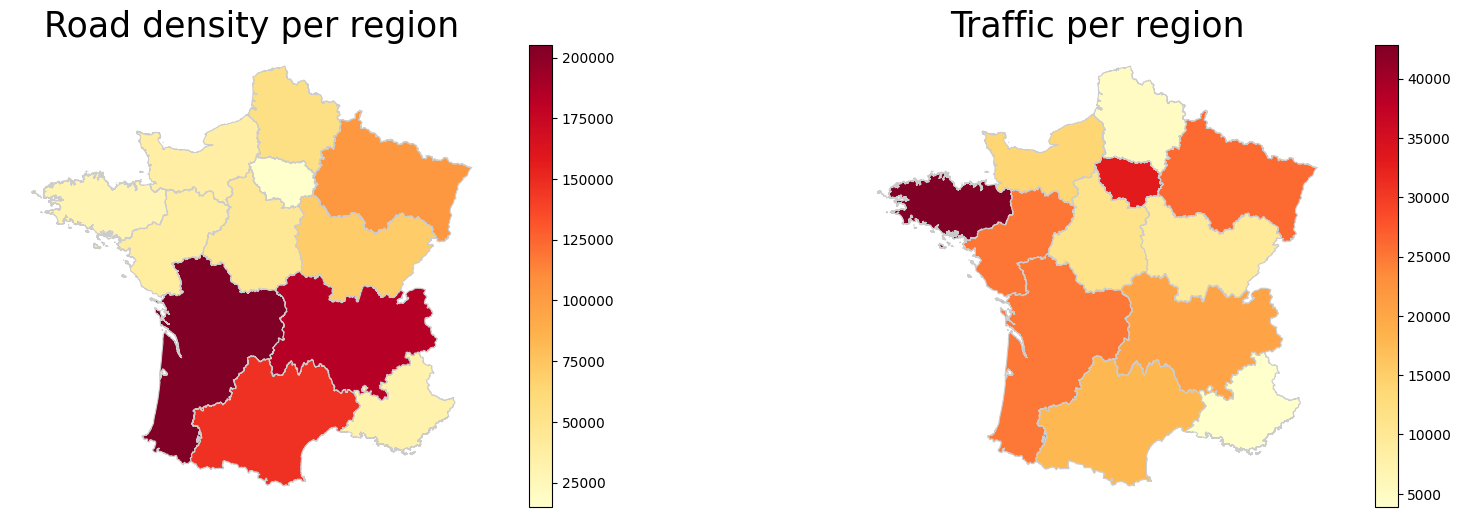

In [12]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot the road density on the left subplot
axs[0].axis('off')
axs[0].set_title('Road density per region', fontdict={'fontsize': '25', 'fontweight' : '3'})
region_data.plot(column='density_road (K km/km2)', cmap='YlOrRd', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)

# Plot the traffic on the right subplot
axs[1].axis('off')
axs[1].set_title('Traffic per region', fontdict={'fontsize': '25', 'fontweight' : '3'})
region_data.plot(column='Avg TMJA_PL', cmap='YlOrRd', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)

# Show the plot
plt.show()


## Road Total Distance per region

## Strategy

To estimate the number of H2 truck charging stations in France in 2030 and 2040, we need to consider several factors such as the number of H2 trucks in France and Europe, the autonomy of trucks, driver regulations, and the motorway network in France. Here are some scenarios that can be considered:

**Scenario 1: H2 Trucks with 1000km Autonomy**
Assuming that all H2 trucks in France have a 1000km autonomy and the current motorway network remains the same, we can estimate the number of H2 truck charging stations required based on the distance between two charging stations, the number of trucks, and the time required for charging. For instance, if we assume that there are 10,000 H2 trucks in France in 2030 and they drive an average of 200 km per day, we would need approximately 50 H2 truck charging stations in France. However, this number would increase if we consider that drivers cannot drive more than 4 hours 30 and need to take breaks for charging, and also if we consider the increase in the number of H2 trucks in Europe that might be driving through France.

**Scenario 2: H2 and Internal Combustion Trucks with 150km Autonomy**
If we assume that only a fraction of the H2 trucks in France have a 1000km autonomy and the rest have a 150km autonomy similar to the internal combustion trucks, we would need to estimate the number of charging stations for both types of trucks. This scenario could be more complex, as we need to consider the ratio between the number of H2 and internal combustion trucks, the driving routes, and the frequency of charging stations for both types of trucks.

**Scenario 3: H2 Trucks with 400km Autonomy**
If we assume that H2 trucks in France have a 400km autonomy, we would need to have more charging stations along the driving routes, especially if the number of H2 trucks in France and Europe increases significantly. Additionally, this scenario might require a larger number of charging stations as drivers would need to take more frequent breaks for charging.

In summary, sizing the network of H2 truck charging stations in France requires taking into consideration several factors such as the number of trucks, autonomy, driving routes, driver regulations, and motorway network. The above scenarios can serve as a starting point for estimating the number of charging stations required, but more detailed analyses and simulations are required to provide accurate estimates.

To calculate the number of trucks needed in each region for each scenario, we need to make some assumptions regarding the following factors:

- Average daily driving time for a truck driver
- Number of working days in a week
- Average truck speed
- Number of refueling stops per day
- Refueling time per stop

In [66]:
df_route

,Région,Autoroutes,Routes nationales,Routes_tot
0,Auvergne-Rhône-Alpes,1698,1100,2798
1,Bourgogne-Franche-Comté,901,773,1674
2,Bretagne,50,1009,1059
3,Centre-Val de Loire,980,342,1322
4,Corse,0,0,0
5,Grand Est,1305,935,2240
6,Hauts-de-France,1179,567,1746
7,Île-de-France,620,489,1109
8,Normandie,728,570,1298
9,Nouvelle-Aquitaine,1465,1284,2749


In [54]:
tank_size_daimler = 2 * 40  # kg
tank_size_nikola = 32  # kg
tank_size_daf = 30 # kg assumption

autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km

max_drive_time = 4.5  # maximum driving time per shift (hours)
max_drive_time_weekly = 56  # maximum driving time per week (hours)
max_drive_time_daily = 9  # maximum driving time per day (hours)

avg_speed = 80 #km/h

total_trucks = 10000

In [67]:
region_data

,surf_km2,geometry,region,longueur (K km),Avg TMJA_PL,density_road (K km/km2)
0,12.069,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ...",Île-de-France,1236.953,33092.56,14928.79
1,31.935,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0...",Hauts-de-France,1706.436,5038.22,54495.03
2,84.747,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43...",Nouvelle-Aquitaine,2420.721,24897.84,205148.84
3,30.139,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49...",Normandie,1239.708,13864.34,37363.56
4,32.430,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47...",Pays de la Loire,1201.228,25081.73,38955.82
5,39.530,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ...",Centre-Val de Loire,1136.256,11234.61,44916.20
6,57.725,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ...",Grand Est,1792.295,26028.76,103460.23
7,31.840,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",Provence-Alpes-Côte d'Azur,1005.628,3882.49,32019.20
8,27.498,"MULTIPOLYGON (((-4.79551 48.41438, -4.79551 48...",Bretagne,1064.210,42837.19,29263.65
9,48.059,"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ...",Bourgogne-Franche-Comté,1454.906,9602.53,69921.33


In [100]:
# merge region and route to have the AVG TMJA_PL

df_route_traffic = df_route.merge(region_data, left_on="Région", right_on="region")
df_route_traffic = df_route_traffic[df_route_traffic.columns[[0, 1, 2, 3, 8]]]
df_route_traffic

,Région,Autoroutes,Routes nationales,Routes_tot,Avg TMJA_PL
0,Auvergne-Rhône-Alpes,1698,1100,2798,20323.24
1,Bourgogne-Franche-Comté,901,773,1674,9602.53
2,Bretagne,50,1009,1059,42837.19
3,Centre-Val de Loire,980,342,1322,11234.61
4,Grand Est,1305,935,2240,26028.76
5,Hauts-de-France,1179,567,1746,5038.22
6,Île-de-France,620,489,1109,33092.56
7,Normandie,728,570,1298,13864.34
8,Nouvelle-Aquitaine,1465,1284,2749,24897.84
9,Occitanie,1242,1107,2349,17766.78


In [101]:
# Calculate the sum of the Avg TMJA_PL column
tmja_sum = df_route_traffic['Avg TMJA_PL'].sum()

# Calculate the percentage of traffic in each region
df_route_traffic['percentage_traffic'] = round(df_route_traffic['Avg TMJA_PL'] / tmja_sum, 2)
df_route_traffic

,Région,Autoroutes,Routes nationales,Routes_tot,Avg TMJA_PL,percentage_traffic
0,Auvergne-Rhône-Alpes,1698,1100,2798,20323.24,0.09
1,Bourgogne-Franche-Comté,901,773,1674,9602.53,0.04
2,Bretagne,50,1009,1059,42837.19,0.18
3,Centre-Val de Loire,980,342,1322,11234.61,0.05
4,Grand Est,1305,935,2240,26028.76,0.11
5,Hauts-de-France,1179,567,1746,5038.22,0.02
6,Île-de-France,620,489,1109,33092.56,0.14
7,Normandie,728,570,1298,13864.34,0.06
8,Nouvelle-Aquitaine,1465,1284,2749,24897.84,0.11
9,Occitanie,1242,1107,2349,17766.78,0.08


In [118]:
import math

def calculate_hydrogen_stations(df, daimler_perc, nikola_perc, daf_perc, year):
    """
    Calculate the number of hydrogen stations needed for a given scenario year based on the percentage of three brands of trucks.

    Args:
        df (pandas.DataFrame): The input dataframe with the traffic data for each region.
        daimler_perc (float): The percentage of Daimler trucks in the scenario (between 0 and 1).
        nikola_perc (float): The percentage of Nikola trucks in the scenario (between 0 and 1).
        daf_perc (float): The percentage of DAF trucks in the scenario (between 0 and 1).
        year (int): The year of the scenario.

    Returns:
        pandas.DataFrame: A dataframe with the region and the number of hydrogen stations needed.
    """ 
    # Assumptions and constraints
    avg_speed = 80  # km/h
    max_drive_time_daily = 9  # hours
    break_time = 0.33 # hours
    autonomy_daimler = 1000  # km
    autonomy_nikola = 400  # km
    autonomy_daf = 150  # km
    tank_size_daimler = 80
    tank_size_nikola = 32
    tank_size_daf = 30
    capacity_stations = 1000

    # Determine the total number of trucks based on the scenario year
    if year == 2030:
        total_trucks = 10000
    elif year == 2040:
        total_trucks = 60000
    else:
        raise ValueError("Year must be 2030 or 2040")
    
    # Calculate the number of trucks for each brand based on the percentages
    num_daimler_trucks = int(total_trucks * daimler_perc)
    num_nikola_trucks = int(total_trucks * nikola_perc)
    num_daf_trucks = int(total_trucks * daf_perc)

    # Initialize list to store results
    results = []

    # Loop through each row in the dataframe and perform necessary calculations
    for index, row in df.iterrows():
        #calculate max daily distance
        max_daily_distance = avg_speed * max_drive_time_daily

        # Calculate the number of stops per day for each truck
        daimler_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daimler)
        nikola_num_stops_per_day = math.ceil(max_daily_distance / autonomy_nikola)
        daf_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daf)

        # Calculate the total time for each truck to cover the region
        total_time = row['Routes_tot'] / avg_speed

        # Calculate the working time for each truck, including breaks and recharge times
        dailmer_working_time = total_time + (daimler_num_stops_per_day * break_time)
        nikola_working_time = total_time + (nikola_num_stops_per_day * break_time)
        daf_working_time = total_time + (daf_num_stops_per_day * break_time)
    
        # Calculate the number of days each truck needs to cover the region
        dailmer_day_region = math.ceil(dailmer_working_time / max_drive_time_daily)
        nikola_day_region = math.ceil(nikola_working_time / max_drive_time_daily)
        daf_day_region = math.ceil(daf_working_time / max_drive_time_daily)
        
        # Calculate the total hydrogen consumption for each truck in each region
        hydrogen_dailmer = daimler_num_stops_per_day * tank_size_daimler * (num_daimler_trucks * row['percentage_traffic'])
        hydrogen_nikola = nikola_num_stops_per_day * tank_size_nikola * (num_nikola_trucks * row['percentage_traffic'])
        hydrogen_daf = daf_num_stops_per_day * tank_size_daf * (num_daf_trucks * row['percentage_traffic'])

        #total hydrogen needed daily
        total_hydrogen = hydrogen_dailmer + hydrogen_dailmer + hydrogen_daf

        #stations needed
        stations = total_hydrogen / capacity_stations

        # Append region and number of hydrogen stations to results list
        results.append({'Region': row['Région'], 'Hydrogen Stations Needed': math.ceil(stations)})
        
    # Create dataframe from results list and return it
    results_df = pd.DataFrame(results)

    return results_df
    


In [119]:
results = calculate_hydrogen_stations(df_route_traffic, 0.25, 0.25, 0.5, 2030)
results

,Region,Hydrogen Stations Needed
0,Auvergne-Rhône-Alpes,104
1,Bourgogne-Franche-Comté,46
2,Bretagne,207
3,Centre-Val de Loire,58
4,Grand Est,127
5,Hauts-de-France,23
6,Île-de-France,162
7,Normandie,69
8,Nouvelle-Aquitaine,127
9,Occitanie,92


In [55]:
daimler_perc = 0.25
nikola_perc = 0.25
daf_perc = 0.50

In [56]:
  # Calculate the number of trucks for each brand based on the percentages
num_daimler_trucks = int(total_trucks * daimler_perc)
num_nikola_trucks = int(total_trucks * nikola_perc)
num_daf_trucks = int(total_trucks * daf_perc)

1- Calculate the maximum distance a Daimler truck can travel in a day:

In [57]:
max_daily_distance = avg_speed * max_drive_time_daily
max_daily_distance

720

2- Calculate the number of stops needed per day for each truck:

In [58]:
import math

daimler_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daimler)
daimler_num_stops_per_day

1

In [59]:
nikola_num_stops_per_day = math.ceil(max_daily_distance / autonomy_nikola)
nikola_num_stops_per_day

2

In [60]:
daf_num_stops_per_day = math.ceil(max_daily_distance / autonomy_daf)
daf_num_stops_per_day

5

Time to cover the region x (ie. 2798 km)

In [75]:
total_time = 2798 / avg_speed
total_time

34.975

Subtract the time needed for breaks and recharging stops. To do this, you can use the following formula:

Working time = Total time - (Number of stops * Stop time)

In [85]:
dailmer_working_time = total_time + (daimler_num_stops_per_day*0.33)
dailmer_working_time

35.305

In [86]:
nikola_working_time = total_time + (nikola_num_stops_per_day*0.33)
nikola_working_time

35.635

In [87]:
daf_working_time = total_time + (daf_num_stops_per_day*0.33)
daf_working_time

36.625

Divide the working time by the maximum daily working time to get the number of days needed to cover the distance. To do this, you can use the following formula:

Number of days = Working time / Maximum daily working time

In [88]:
dailmer_day_region = math.ceil(dailmer_working_time / max_drive_time_daily)
dailmer_day_region

4

In [89]:
nikola_day_region = math.ceil(nikola_working_time / max_drive_time_daily)
nikola_day_region

4

In [90]:
daf_day_region = math.ceil(daf_working_time / max_drive_time_daily)
daf_day_region

5

Consumption per day

In [103]:
hydrogen_dailmer = daimler_num_stops_per_day * tank_size_daimler * (num_daimler_trucks * 0.09)
hydrogen_dailmer

18000.0

In [104]:
hydrogen_nikola = nikola_num_stops_per_day * tank_size_nikola * num_nikola_trucks * 0.09
hydrogen_nikola

14400.0

In [105]:
hydrogen_naf = daimler_num_stops_per_day * tank_size_daimler * num_daimler_trucks * 0.09
hydrogen_naf

18000.0

3- Calculate the number of stops needed to cover region x:

In [106]:
total_hydrogen = hydrogen_dailmer + hydrogen_dailmer + hydrogen_naf 
total_hydrogen

54000.0

In [107]:
stations = total_hydrogen / 1000
stations

54.0

In [61]:
dailmer_stops_region = math.ceil(2798/(max_daily_distance/daimler_num_stops_per_day))
dailmer_stops_region

4

In [62]:
nikola_stops_region = math.ceil(2798/(max_daily_distance/nikola_num_stops_per_day))
nikola_stops_region

8

In [63]:
daf_stops_region = math.ceil(2798/(max_daily_distance/daf_num_stops_per_day))
daf_stops_region

20

Days to cover the region

Calculate hydrogen consumption per day for each truck type

In [64]:
dailmer_h2_per_day = tank_size_daimler * daimler_num_stops_per_day
nikola_h2_per_day = tank_size_nikola * nikola_num_stops_per_day
daf_h2_per_day = tank_size_daf * daf_num_stops_per_day

In [65]:
daf_h2_per_day

150

In [47]:
# Calculate total hydrogen consumption per day for each truck type and for the fleet
da_total_h2_per_day = dailmer_h2_per_day * num_daimler_trucks
nikola_total_h2_per_day = nikola_h2_per_day * num_nikola_trucks
daf_total_h2_per_day = daf_h2_per_day * num_daf_trucks
total_h2_per_day_2030 = da_total_h2_per_day + nikola_total_h2_per_day + daf_total_h2_per_day

In [48]:
total_h2_per_day_2030/1000

1110.0

In [20]:
# Calculate the average daily distance traveled by each brand of truck
avg_daily_distance_daimler = autonomy_daimler * max_drive_time_daily
avg_daily_distance_nikola = autonomy_nikola * max_drive_time_daily
avg_daily_distance_daf = autonomy_daf * max_drive_time_daily

In [45]:
avg_daily_distance_daimler

9000

In [36]:
max_distance_daily = max_drive_time_daily * avg_speed
max_distance_daily

720

So we need to make sure that there is at least one H2 station within 720 km of any point in region x to ensure that a Daimler truck can make the trip without running out of fuel.

So we need to make sure that there is at least one H2 station within 720 km of any point in region x to ensure that a Daimler truck can make the trip without running out of fuel.

In [44]:
Given that region x has 1236.953 k km of roads, we can estimate the number of H2 stations needed as follows:

SyntaxError: invalid syntax (2951641808.py, line 1)

First, we need to calculate the total daily distance traveled by all Daimler trucks in the region:

Total daily distance = (Trucks per hour in the region) * (Hours of operation per day) * (Average speed of Daimler trucks)

We can assume that the stations are open for 24 hours a day. Assuming an average speed of 80 km/h for Daimler trucks:

In [42]:
daimler_trucks_perh = num_daimler_trucks / 24
daimler_trucks_perh

104.16666666666667

In [43]:
daimler_tot_daily_distance = daimler_trucks_perh * 24 * avg_speed
daimler_tot_daily_distance

200000.0

In [39]:
num_daimler_trucks

2500

In [40]:
1236.953 / 720

1.7179902777777778

In [41]:
autonomy_daimler

1000

In [37]:
daimler_stations = num_daimler_trucks * 1236.953 / (14928.79 * max_distance_daily / autonomy_daimler)

In [38]:
daimler_stations

287.6975089370568

In [46]:
def estimate_h2_stations(df, daimler_perc, nikola_perc, daf_perc, year):
    #define constraints and assumptions
    tank_size_daimler = 2 * 40  # kg
    tank_size_nikola = 32  # kg
    rank_size_daf = 30 # kg assumption
    autonomy_daimler = 1000  # km
    autonomy_nikola = 400  # km
    autonomy_daf = 150  # km
    max_drive_time = 4.5  # maximum driving time per shift (hours)
    max_drive_time_weekly = 56  # maximum driving time per week (hours)
    max_drive_time_daily = 9  # maximum driving time per day (hours)
    avg_speed = 80  # km/h
    
    # Calculate the total number of trucks
    if year == 2030:
        total_trucks = 10000
    elif year == 2040:
        total_trucks = 60000

    # Calculate the number of trucks for each brand based on the percentages
    num_daimler_trucks = int(total_trucks * daimler_perc)
    num_nikola_trucks = int(total_trucks * nikola_perc)
    num_daf_trucks = int(total_trucks * daf_perc)

    # Create a dictionary to store the number of stations needed for each brand in each region
    stations = {}

    # Iterate over each region in the dataframe
    for index, row in df.iterrows():
        region = row['region']
        surf_km2 = row['surf_km2']
        longueur = row['longueur']
        density_road = row['density_road']

        # Calculate the number of Daimler stations needed in the region
        num_stations_daimler = math.ceil((num_daimler_trucks * surf_km2) / 
                                         (autonomy_daimler * longueur * trucks_per_hour))

        # Calculate the number of Nikola stations needed in the region
        num_stations_nikola = math.ceil((num_nikola_trucks * surf_km2) / 
                                        (autonomy_nikola * longueur * trucks_per_hour))

        # Calculate the number of DAF stations needed in the region
        num_stations_daf = math.ceil((num_daf_trucks * surf_km2) / 
                                     (autonomy_daf * longueur * trucks_per_hour))

        # Add the number of stations needed for each brand in the region to the dictionary
        stations[region] = {'Daimler': num_stations_daimler,
                            'Nikola': num_stations_nikola,
                            'DAF': num_stations_daf}

    return stations


In [48]:
estimate_h2_stations(region_data, 0.25, 0.25, 0.5, 2030)

KeyError: 'longueur'

In [28]:
def estimate_h2_stations(df, daimler_perc, nikola_perc, daf_perc, year):
    # Define truck constraints
    tank_size_daimler = 2 * 40  # kg
    tank_size_nikola = 32  # kg
    rank_size_daf = 30 # kg assumption
    autonomy_daimler = 1000  # km
    autonomy_nikola = 400  # km
    autonomy_daf = 150  # km

    # Define driver constraints
    max_drive_time = 4.5  # maximum driving time per shift (hours)
    max_drive_time_weekly = 56  # maximum driving time per week (hours)
    max_drive_time_daily = 9  # maximum driving time per day (hours)

    # Define truck parameters
    avg_speed = 80  # km/h
    trucks_per_hour = 60 / max_drive_time * 0.9  # maximum number of trucks per hour, accounting for breaks and loading/unloading time

    # Calculate the total number of truck
    if year == 2030:
        total_trucks = 10000
    elif year == 2040:
        total_trucks = 60000

    # Calculate the number of trucks for each brand based on the percentages
    num_daimler_trucks = int(total_trucks * daimler_perc)
    num_nikola_trucks = int(total_trucks * nikola_perc)
    num_daf_trucks = int(total_trucks * daf_perc)
    
    # Calculate the average daily distance traveled by each brand of truck
    avg_daily_distance_daimler = autonomy_daimler * max_drive_time_daily
    avg_daily_distance_nikola = autonomy_nikola * max_drive_time_daily
    avg_daily_distance_daf = autonomy_daf * max_drive_time_daily
    
    # Create a dictionary to store the total daily distance traveled by trucks in each region
    daily_distance_by_region = {}
    for region in df['region'].unique():
        daily_distance_by_region[region] = 0
    
    # Calculate the total daily distance traveled by each brand of truck in each region
    for index, row in df.iterrows():
        region = row['region']
        distance = row['longueur (K km)'] * 1000
        daily_traffic = row['Avg TMJA_PL']
        if row['route'] == 'daimler':
            daily_distance_by_region[region] += (num_daimler_trucks * daily_traffic * avg_daily_distance_daimler)
        elif row['route'] == 'nikola':
            daily_distance_by_region[region] += (num_nikola_trucks * daily_traffic * avg_daily_distance_nikola)
        elif row['route'] == 'daf':
            daily_distance_by_region[region] += (num_daf_trucks * daily_traffic * avg_daily_distance_daf)
            
    # Calculate the total daily distance traveled in each region
    total_daily_distance_by_region = sum(daily_distance_by_region.values())
    
    # Calculate the total daily H2 consumption in each region
    total_daily_h2_consumption_by_region = {}
    for region in df['region'].unique():
        total_daily_h2_consumption_by_region[region] = (daily_distance_by_region[region] * 2) / tank_size_daimler
        total_daily_h2_consumption_by_region[region] += (daily_distance_by_region[region] * 1) / tank_size_nikola
        total_daily_h2_consumption_by_region[region] += (daily_distance_by_region[region] * 1) / tank_size_nikola
        
    # Calculate the estimated number of H2 charging stations needed in each region
    h2_stations_by_region = {}
    for region in df['region'].unique():
        h2_stations_by_region[region] = total_daily_h2_consumption_by_region[region] / (total_daily_distance_by_region / 365)
        
    return h2_stations_by_region


In [30]:
estimate_h2_stations(region_data, 0.25, 0.25, 0.5, 2030)

KeyError: 'route'

In [27]:
region_data

,surf_km2,geometry,region,longueur (K km),Avg TMJA_PL,density_road (K km/km2)
0,12.069,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ...",Île-de-France,1236.953,33092.56,14928.79
1,31.935,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0...",Hauts-de-France,1706.436,5038.22,54495.03
2,84.747,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43...",Nouvelle-Aquitaine,2420.721,24897.84,205148.84
3,30.139,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49...",Normandie,1239.708,13864.34,37363.56
4,32.430,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47...",Pays de la Loire,1201.228,25081.73,38955.82
5,39.530,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ...",Centre-Val de Loire,1136.256,11234.61,44916.20
6,57.725,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ...",Grand Est,1792.295,26028.76,103460.23
7,31.840,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",Provence-Alpes-Côte d'Azur,1005.628,3882.49,32019.20
8,27.498,"MULTIPOLYGON (((-4.79551 48.41438, -4.79551 48...",Bretagne,1064.210,42837.19,29263.65
9,48.059,"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ...",Bourgogne-Franche-Comté,1454.906,9602.53,69921.33


In [36]:
#Define driver and truck constraints
max_drive_time = 4.5  # maximum driving time per shift (hours)
max_drive_time_weekly = 56  # maximum driving time per week (hours)
max_drive_time_2weeks = 90  # maximum driving time per 2 weeks (hours)
max_drive_time_daily = 9  # maximum driving time per day (hours)
max_drive_time_twice_a_week = 10  # maximum driving time twice a week (hours)

# Define truck constraints
tank_size_daimler = 2 * 40  # kg
tank_size_nikola = 32  # kg
autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km

# Define number of trucks by scenario
h2_truck_2030 = 10000
h2_truck_2040 = 60000

# Assumptions
average_speed = 80  # km/hour
refueling_stops_per_day = 2
refueling_time_per_stop = 15  # minutes


In [ ]:
import math

def calculate_h2_stations(df, percentage_x, percentage_y, percentage_z, scenario_year):
    # Define driver and truck constraints
    max_drive_time = 4.5  # maximum driving time per shift (hours)
    max_drive_time_weekly = 56  # maximum driving time per week (hours)
    max_drive_time_2weeks = 90  # maximum driving time per 2 weeks (hours)
    max_drive_time_daily = 9  # maximum driving time per day (hours)
    max_drive_time_twice_a_week = 10  # maximum driving time twice a week (hours)

    # Define truck constraints
    tank_size_daimler = 2 * 40  # kg
    tank_size_nikola = 32  # kg
    autonomy_daimler = 1000  # km
    autonomy_nikola = 400  # km
    autonomy_daf = 150  # km

    # Define number of trucks by scenario
    if scenario_year == 2030:
        h2_truck_2030 = 10000
        h2_truck_2040 = 0
    elif scenario_year == 2040:
        h2_truck_2030 = 0
        h2_truck_2040 = 60000
    else:
        raise ValueError("Invalid scenario year. Allowed values are 2030 and 2040.")

    # Assumptions
    average_speed = 80  # km/hour
    refueling_stops_per_day = 2
    refueling_time_per_stop = 15  # minutes

    # Calculate number of trucks for each brand based on the given percentages
    total_trucks = percentage_x + percentage_y + percentage_z
    num_trucks_x = math.ceil(h2_truck_2030 * percentage_x / total_trucks)
    num_trucks_y = math.ceil(h2_truck_2030 * percentage_y / total_trucks)
    num_trucks_z = math.ceil(h2_truck_2030 * percentage_z / total_trucks)

    # Calculate total driving time per truck per day
    total_drive_time_per_day = refueling_stops_per_day * (refueling_time_per_stop / 60 + (df['longueur'] / average_speed))

    # Calculate total driving time per week per truck
    total_drive_time_per_week = total_drive_time_per_day * 5

    # Calculate total driving time per two weeks per truck
    total_drive_time_per_2weeks = total_drive_time_per_week * 2

    # Calculate number of refuelings per week per truck
    num_refuelings_per_week = math.ceil(total_drive_time_per_week / max_drive_time_daily)

    # Calculate number of refuelings per two weeks per truck
    num_refuelings_per_2weeks = math.ceil(total_drive_time_per_2weeks / max_drive_time_2weeks)

    # Calculate daily distance per truck
    daily_distance = max_drive_time_daily * average_speed

    # Calculate number of refueling stops per day per truck
    num_refueling_stops_per_day_per_truck = math.ceil(daily_distance / autonomy_daf)

    # Calculate number of refueling stops per week per truck
    num_refueling_stops_per_week_per_truck = num_refueling_stops_per_day_per_truck * 5

    # Calculate number of ref


In [ ]:
def estimate_h2_stations_needed(df, scenario, daimler_pct, nikola_pct, daf_pct):
    # Define driver and truck constraints
    max_drive_time = 4.5  # maximum driving time per shift (hours)
    max_drive_time_weekly = 56  # maximum driving time per week (hours)
    max_drive_time_2weeks = 90  # maximum driving time per 2 weeks (hours)
    max_drive_time_daily = 9  # maximum driving time per day (hours)
    max_drive_time_twice_a_week = 10  # maximum driving time twice a week (hours)

    # Define truck constraints
    tank_size_daimler = 2 * 40  # kg
    tank_size_nikola = 32  # kg
    autonomy_daimler = 1000  # km
    autonomy_nikola = 400  # km
    autonomy_daf = 150  # km

    # Define number of trucks by scenario and percentage
    total_trucks = h2_truck_2030 if scenario == '2030' else h2_truck_2040
    num_daimler_trucks = int(total_trucks * daimler_pct)
    num_nikola_trucks = int(total_trucks * nikola_pct)
    num_daf_trucks = int(total_trucks * daf_pct)

    # Assumptions
    average_speed = 80  # km/hour
    refueling_stops_per_day = 2
    refueling_time_per_stop = 15  # minutes

    # Calculate total truck distance traveled per week by region
    df['total_distance_traveled'] = df['longeur (thousands km)'] * 1000 * (52 / 12)

    # Calculate average daily truck distance traveled by region
    df['avg_daily_distance'] = df['total_distance_traveled'] / 5

    # Calculate number of shifts per day per truck
    num_shifts_per_day_per_truck = int(max_drive_time_daily / max_drive_time)

    # Calculate number of shifts per week per truck
    num_shifts_per_week_per_truck = num_shifts_per_day_per_truck * 5

    # Calculate number of shifts per 2 weeks per truck
    num_shifts_per_2weeks_per_truck = num_shifts_per_day_per_truck * 10

    # Calculate maximum distance per shift per truck for each brand
    max_distance_per_shift_daimler = autonomy_daimler / num_shifts_per_day_per_truck
    max_distance_per_shift_nikola = autonomy_nikola / num_shifts_per_day_per_truck
    max_distance_per_shift_daf = autonomy_daf / num_shifts_per_day_per_truck

    # Calculate maximum distance per week per truck for each brand
    max_distance_per_week_daimler = max_distance_per_shift_daimler * num_shifts_per_week_per_truck
    max_distance_per_week_nikola = max_distance_per_shift_nikola * num_shifts_per_week_per_truck
    max_distance_per_week_daf = max_distance_per_shift_daf * num_shifts_per_week_per_truck

    # Calculate maximum distance per 2 weeks per truck for each brand
    max_distance_per_2weeks_daimler = max_distance_per_shift_daimler * num_shifts_per_2weeks_per_truck
    max_distance_per_2weeks_nikola = max_distance_per_shift_nikola * num_shift


In [61]:
def calculate_h2_stations_needed(df, daimler_percent, nikola_percent, daf_percent, year_scenario):
    
    # Define driver and truck constraints
    max_drive_time = 4.5  # maximum driving time per shift (hours)
    max_drive_time_weekly = 56  # maximum driving time per week (hours)
    max_drive_time_2weeks = 90  # maximum driving time per 2 weeks (hours)
    max_drive_time_daily = 9  # maximum driving time per day (hours)
    max_drive_time_twice_a_week = 10  # maximum driving time twice a week (hours)

    # Define truck constraints
    tank_size_daimler = 2 * 40  # kg
    tank_size_nikola = 32  # kg
    autonomy_daimler = 1000  # km
    autonomy_nikola = 400  # km
    autonomy_daf = 150  # km

    # Define number of trucks by scenario
    if year_scenario == 2030:
        total_trucks = 10000
    elif year_scenario == 2040:
        total_trucks = 60000
        
    daimler_trucks = int(daimler_percent * total_trucks)
    nikola_trucks = int(nikola_percent * total_trucks)
    daf_trucks = int(daf_percent * total_trucks)

    # Calculate fuel consumption per truck and per km for each brand
    fuel_consumption_daimler = tank_size_daimler / autonomy_daimler
    fuel_consumption_nikola = tank_size_nikola / autonomy_nikola
    fuel_consumption_daf = 1.5 # assume 1.5 kg/km for DAF

    # Calculate the number of km driven per truck per day
    km_per_day_daimler = refueling_stops_per_day * autonomy_daimler
    km_per_day_nikola = refueling_stops_per_day * autonomy_nikola
    km_per_day_daf = refueling_stops_per_day * autonomy_daf

    # Calculate the number of km driven per week per truck
    km_per_week_daimler = km_per_day_daimler * 5
    km_per_week_nikola = km_per_day_nikola * 5
    km_per_week_daf = km_per_day_daf * 5

    # Calculate the number of km driven per 2 weeks per truck
    km_per_2weeks_daimler = km_per_day_daimler * 10
    km_per_2weeks_nikola = km_per_day_nikola * 10
    km_per_2weeks_daf = km_per_day_daf * 10

    # Calculate the number of hours driven per week per truck
    hours_per_week_daimler = km_per_week_daimler / average_speed
    hours_per_week_nikola = km_per_week_nikola / average_speed
    hours_per_week_daf = km_per_week_daf / average_speed

    # Calculate the number of hours driven per 2 weeks per truck
    hours_per_2weeks_daimler = km_per_2weeks_daimler / average_speed
    hours_per_2weeks_nikola = km_per_2weeks_nikola / average_speed
    hours_per_2weeks_daf = km_per_2weeks_daf / average_speed

    num_refueling_stations_per_week_daimler = (km_per_week_daimler * tank_size_daimler) / (autonomy_daimler * h2_trucks_total * truck_percentage_daimler)
    num_refueling_stations_per_week_nikola = (km_per_week_nikola * tank_size_nikola) / (autonomy_nikola * h2_trucks_total * truck_percentage_nikola)
    num_refueling_stations_per_week_daf = (km_per_week_daf * tank_size_daf) / (autonomy_daf * h2_trucks_total * truck_percentage_daf)


In [53]:
daimler_percent = 0.25
nikola_percent = 0.25
daf_percent = 0.50

# Define driver and truck constraints
max_drive_time = 4.5  # maximum driving time per shift (hours)
max_drive_time_weekly = 56  # maximum driving time per week (hours)
max_drive_time_2weeks = 90  # maximum driving time per 2 weeks (hours)
max_drive_time_daily = 9  # maximum driving time per day (hours)
max_drive_time_twice_a_week = 10  # maximum driving time twice a week (hours)

# Define truck constraints
tank_size_daimler = 2 * 40  # kg
tank_size_nikola = 32  # kg
tank_size_daf = 30  # kg assumed
autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km

# Define number of trucks by scenario

total_trucks30 = 10000
total_trucks40 = 60000
    
daimler_trucks = int(daimler_percent * total_trucks30)
nikola_trucks = int(nikola_percent * total_trucks30)
daf_trucks = int(daf_percent * total_trucks30)

In [43]:
daimler_trucks

2500

In [54]:
# Calculate fuel consumption per truck and per km for each brand
fuel_consumption_daimler = tank_size_daimler / autonomy_daimler
fuel_consumption_nikola = tank_size_nikola / autonomy_nikola
fuel_consumption_daf = tank_size_daf / autonomy_daf

In [56]:
# Calculate the number of km driven per truck per day
km_per_day_daimler = refueling_stops_per_day * autonomy_daimler
km_per_day_nikola = refueling_stops_per_day * autonomy_nikola
km_per_day_daf = refueling_stops_per_day * autonomy_daf

In [57]:
# Calculate the number of km driven per week per truck
km_per_week_daimler = km_per_day_daimler * 5
km_per_week_nikola = km_per_day_nikola * 5
km_per_week_daf = km_per_day_daf * 5

300

In [58]:
# Calculate number of km driven per day per truck
km_per_day_daimler = autonomy_daimler / max_drive_time_daily
km_per_day_nikola = autonomy_nikola / max_drive_time_daily
km_per_day_daf = autonomy_daf / max_drive_time_daily

In [60]:
km_per_day_daimler*5*2

1111.111111111111

In [62]:
# Define driver and truck constraints
max_drive_time = 4.5  # maximum driving time per shift (hours)
max_drive_time_weekly = 56  # maximum driving time per week (hours)
max_drive_time_daily = 9  # maximum driving time per day (hours)

# Define truck constraints
tank_size_daimler = 2 * 40  # kg
tank_size_nikola = 32  # kg
tank_size_daf = 30  # kg assumed
autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km

# Define number of trucks by scenario
total_trucks30 = 10000
total_trucks40 = 60000

In [ ]:
 # Assumptions
average_speed = 80  # km/hour
refueling_stops_per_day = 2
refueling_time_per_stop = 15

In [63]:
daimler_percent = 0.25
nikola_percent = 0.25
daf_percent = 0.50

In [64]:
daimler_trucks = int(daimler_percent * total_trucks30)
nikola_trucks = int(nikola_percent * total_trucks30)
daf_trucks = int(daf_percent * total_trucks30)

In [ ]:
import pandas as pd
import math

# Load data
data = pd.read_csv('your_data.csv')

# Define driver and truck constraints
max_drive_time = 4.5  # maximum driving time per shift (hours)
max_drive_time_weekly = 56  # maximum driving time per week (hours)
max_drive_time_daily = 9  # maximum driving time per day (hours)

# Define truck constraints
tank_size_daimler = 2 * 40  # kg
tank_size_nikola = 32  # kg
autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km

# Define number of trucks by scenario
h2_truck_2030 = 10000
h2_truck_2040 = 60000

# Assumptions
average_speed = 80  # km/hour
refueling_time_per_stop = 15  # minutes

# Define percentage of each truck brand
daimler_percent = 1.0  # 100%
nikola_percent = 0.0  # 0%
daf_percent = 0.0  # 0%

# Calculate the total distance in each region
region_distance = data.groupby(['region'])['longeur (thousands km)'].sum()

# Calculate the total truck traffic in each region
region_truck_traffic = data.groupby(['region'])['Avg TMJA_PL'].sum()

# Calculate the total number of H2 stations needed in each region
region_h2_stations = {}
for region in region_distance.index:
    # Calculate the total driving time per day for each truck brand
    daimler_drive_time = min(max_drive_time_daily, autonomy_daimler / average_speed)
    nikola_drive_time = min(max_drive_time_daily, autonomy_nikola / average_speed)
    daf_drive_time = min(max_drive_time_daily, autonomy_daf / average_speed)

    # Calculate the total number of trucks in each brand for 2030
    total_trucks = {
        'daimler': math.ceil(h2_truck_2030 * daimler_percent),
        'nikola': math.ceil(h2_truck_2030 * nikola_percent),
        'daf': math.ceil(h2_truck_2030 * daf_percent)
    }

    # Calculate the total number of refueling stops needed per day for each truck brand
    daimler_stops_per_day = math.ceil(region_distance[region] / (autonomy_daimler / daimler_drive_time))
    nikola_stops_per_day = math.ceil(region_distance[region] / (autonomy_nikola / nikola_drive_time))
    daf_stops_per_day = math.ceil(region_distance[region] / (autonomy_daf / daf_drive_time))

    # Calculate the total number of H2 stations needed per day for each truck brand
    daimler_h2_stations_per_day = math.ceil(total_trucks['daimler'] * daimler_stops_per_day)
    nikola_h2_stations_per_day = math.ceil(total_trucks['nikola'] * nikola_stops_per_day)
    daf_h2_stations_per_day = math.ceil(total_trucks['daf'] * daf_stops_per_day)

    # Calculate the total number of H2 stations needed per week for each truck brand
    daim


In [66]:
# Calculate the total distance in each region
region_distance = road_data.groupby(['region'])['longeur (thousands km)'].sum()

# Calculate the total truck traffic in each region
region_truck_traffic = road_data.groupby(['region'])['Avg TMJA_PL'].avg()

AttributeError: 'SeriesGroupBy' object has no attribute 'avg'

In [67]:
import math
import pandas as pd

def estimate_h2_stations(df, daimler_trucks, nikola_trucks, daf_trucks):
    # Define driver and truck constraints
    max_drive_time = 4.5  # maximum driving time per shift (hours)
    max_drive_time_weekly = 56  # maximum driving time per week (hours)
    max_drive_time_daily = 9  # maximum driving time per day (hours)

    # Define truck constraints
    tank_size_daimler = 2 * 40  # kg
    tank_size_nikola = 32  # kg
    autonomy_daimler = 1000  # km
    autonomy_nikola = 400  # km
    autonomy_daf = 150  # km

    # Define number of trucks by scenario
    total_trucks = daimler_trucks + nikola_trucks + daf_trucks

    # Assumptions
    average_speed = 80  # km/hour
    refueling_time_per_stop = 15  # minutes

    # Calculate the total number of H2 stations needed per week for each truck brand
    daimler_weekly_stations = math.ceil(daimler_trucks * (autonomy_daimler / (max_drive_time_daily * average_speed / 1000)) * 7)
    nikola_weekly_stations = math.ceil(nikola_trucks * (autonomy_nikola / (max_drive_time_daily * average_speed / 1000)) * 7)
    daf_weekly_stations = math.ceil(daf_trucks * (autonomy_daf / (max_drive_time_daily * average_speed / 1000)) * 7)

    # Group by region and calculate the total distance and average truck traffic per week
    grouped = df.groupby(['region']).agg({'longeur (thousands km)': 'sum', 'Avg TMJA_PL': 'mean'})

    # Calculate the estimated number of H2 stations needed per week for each region
    grouped['daimler_h2_stations'] = grouped['longeur (thousands km)'] * grouped['Avg TMJA_PL'] * daimler_weekly_stations / total_trucks
    grouped['nikola_h2_stations'] = grouped['longeur (thousands km)'] * grouped['Avg TMJA_PL'] * nikola_weekly_stations / total_trucks
    grouped['daf_h2_stations'] = grouped['longeur (thousands km)'] * grouped['Avg TMJA_PL'] * daf_weekly_stations / total_trucks

    # Calculate the total estimated number of H2 stations needed per week for each region
    grouped['total_h2_stations'] = grouped['daimler_h2_stations'] + grouped['nikola_h2_stations'] + grouped['daf_h2_stations']

    # Return the dataframe with region and estimated number of H2 stations
    return grouped[['total_h2_stations']].reset_index()


In [71]:
# Group by region and calculate the total distance and average truck traffic per week
grouped_r = road_data.groupby(['region']).agg({'longeur (thousands km)': 'sum', 'Avg TMJA_PL': 'mean'}).reset_index()
grouped_r['Avg TMJA_PL'] = round(grouped_r['Avg TMJA_PL'], 2)
grouped_r

,region,longeur (thousands km),Avg TMJA_PL
0,Auvergne-Rhône-Alpes,1998.581,2206831.22
1,Bourgogne-Franche-Comté,1454.906,1230497.15
2,Bretagne,1064.210,4128190.71
3,Centre-Val de Loire,1136.256,1331916.29
4,Grand Est,1642.669,1335240.86
5,Hauts-de-France,1407.752,457578.35
6,Normandie,1239.708,1600677.58
7,Nouvelle-Aquitaine,2420.721,2815136.39
8,Occitanie,1944.318,5966742.16
9,Pays de la Loire,1201.228,2393476.74


In [75]:
autonomy_daimler / (max_drive_time_daily * average_speed) 

1.3888888888888888

In [ ]:
# Calculate the total number of H2 stations needed per week for each truck brand
daimler_weekly_stations = math.ceil(10000 * (autonomy_daimler / (max_drive_time_daily * average_speed / 1000)) * 7)

In [68]:

result = estimate_h2_stations(road_data, 10000, 0, 0) # for example, assuming 100% Daimler trucks in 2030
print(result)


                        region  total_h2_stations
0         Auvergne-Rhône-Alpes       4.288016e+13
1      Bourgogne-Franche-Comté       1.740528e+13
2                     Bretagne       4.271227e+13
3          Centre-Val de Loire       1.471359e+13
4                    Grand Est       2.132432e+13
5              Hauts-de-France       6.262636e+12
6                    Normandie       1.929251e+13
7           Nouvelle-Aquitaine       6.625364e+13
8                    Occitanie       1.127899e+14
9             Pays de la Loire       2.795247e+13
10  Provence-Alpes-Côte d'Azur       2.124489e+12
11               Île-de-France       2.621963e+13
